In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style("darkgrid")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题

In [2]:
hero_df = pd.read_csv("hero.csv")
hero_df.head()

,ability_power,armor,armor_penetration,armor_percent,attack_damage,attack_range,attack_speed,cooldown_reduction,critical_damage,critical_strike_chance,...,magic_penetration,magic_resist,magic_resist_percent,mana,mana_regen,movement_speed,name,position,spell_vamp,tenacity
0,0.0,91.0,0.0,13.1,165.0,远程,0.0,0.0,200.0,0.0,...,0.0,50.0,7.6,490.0,18.0,360.0,司马懿,mage,0.0,0.0
1,0.0,79.0,0.0,11.6,171.0,近程,0.0,0.0,200.0,0.0,...,0.0,50.0,7.6,125.0,25.0,530.0,盾山,"tank,support",0.0,0.0
2,0.0,84.0,0.0,12.2,205.0,远程,0.0,0.0,0.0,0.0,...,0.0,50.0,7.6,490.0,18.0,350.0,伽罗,marksman,0.0,0.0
3,0.0,87.0,0.0,12.6,171.0,远程,0.0,0.0,0.0,0.0,...,0.0,50.0,7.6,440.0,15.0,396.0,沈梦溪,mage,0.0,0.0
4,0.0,79.0,0.0,12.6,152.0,远程,0.0,0.0,0.0,0.0,...,0.0,50.0,7.6,440.0,15.0,396.0,上官婉儿,mage,0.0,0.0


In [3]:
def replace_position(value):
    return value.replace("mage","法师").replace("tank","坦克").replace("support","辅助").replace("marksman","射手").replace("fighter","战士").replace("assassin","刺客")
hero_df['position'] = hero_df['position'].apply(replace_position)
hero_df['position'].value_counts()

法师       19
战士       14
射手       14
坦克,战士    11
坦克       10
刺客        8
战士,刺客     7
辅助        5
坦克,辅助     5
法师,辅助     4
坦克,法师     4
刺客,法师     2
战士,法师     1
Name: position, dtype: int64

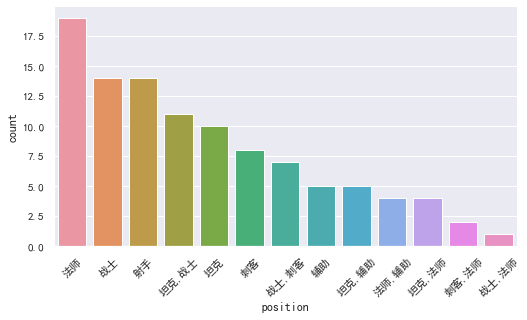

In [5]:
ax = sns.catplot(x="position",data=hero_df,kind="count",order = hero_df['position'].value_counts().index)
ax.fig.set_size_inches(8,4)
_ = ax.set_xticklabels(rotation=45)

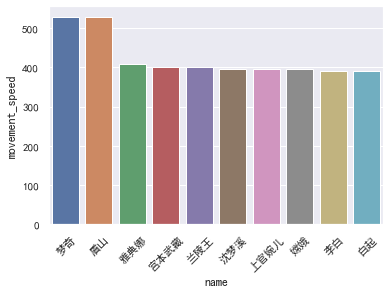

In [28]:
movement_df = hero_df[["name","movement_speed"]].sort_values(ascending=False,by="movement_speed")[:10]
ax = sns.barplot(x="name",y="movement_speed",data=movement_df)
_ = ax.set_xticklabels(labels=ax.xaxis.get_majorticklabels(),rotation=45)

     name  health
101   阿古朵   946.0
6      嫦娥  1600.0
35    武则天  2860.0
70    雅典娜  2862.0
56    花木兰  2886.0
57   宫本武藏  2902.0
17    姜子牙  2958.0
92     弈星  2958.0
85     女娲  2958.0
79     大乔  2958.0


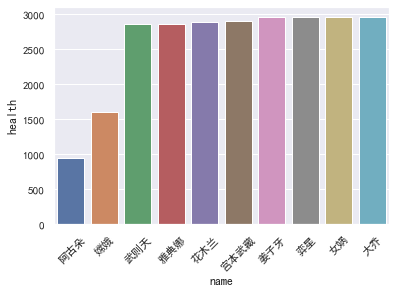

In [34]:
health_df = hero_df[["name","health"]].sort_values(ascending=True,by="health")[:10]
print(health_df)
ax = sns.barplot(x="name",y="health",data=health_df)
_ = ax.set_xticklabels(labels=ax.xaxis.get_majorticklabels(),rotation=45)